In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)    #ignore chained assignment warning

In [65]:
#loading dataset

df_a = pd.read_csv('student/student-mat.csv', sep=';')

df_b = pd.read_csv('exams.csv')
df_b

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,free/reduced,completed,61,84,82
1,female,group C,high school,standard,none,61,63,63
2,male,group B,some college,free/reduced,completed,54,56,55
3,female,group A,master's degree,standard,completed,98,100,100
4,female,group E,high school,standard,none,94,84,86
...,...,...,...,...,...,...,...,...
995,female,group E,some high school,free/reduced,none,58,55,56
996,female,group E,bachelor's degree,free/reduced,completed,48,63,69
997,female,group B,high school,standard,completed,80,84,92
998,male,group D,some high school,standard,none,82,83,82


In [38]:
schoolwise_df = df_a.groupby('school')
schoolwise_df

In [46]:
gp_df = schoolwise_df.get_group('GP')
gp_df.drop('school', axis = 1, inplace = True)
gp_df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,F,18,U,GT3,T,2,3,at_home,other,course,...,4,3,3,1,2,3,4,11,10,10
345,F,18,U,GT3,T,3,2,other,services,other,...,5,4,3,2,3,1,7,13,13,14
346,M,18,R,GT3,T,4,3,teacher,services,course,...,5,3,2,1,2,4,9,16,15,16
347,M,18,U,GT3,T,4,3,teacher,other,course,...,5,4,5,2,3,5,0,10,10,9


In [4]:
ms_df = schoolwise_df.get_group('MS')
ms_df = ms_df.reset_index(drop = True)
ms_df.drop('school', axis = 1, inplace = True)
ms_df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,M,18,R,GT3,T,3,2,other,other,course,...,2,5,5,5,5,5,10,11,13,13
1,M,19,R,GT3,T,1,1,other,services,home,...,5,4,4,3,3,2,8,8,7,8
2,M,17,U,GT3,T,3,3,health,other,course,...,4,5,4,2,3,3,2,13,13,13
3,M,18,U,LE3,T,1,3,at_home,services,course,...,4,3,3,2,3,3,7,8,7,8
4,M,19,R,GT3,T,1,1,other,other,home,...,4,4,4,3,3,5,4,8,8,8
5,M,17,R,GT3,T,4,3,services,other,home,...,4,5,5,1,3,2,4,13,11,11
6,F,18,U,GT3,T,3,3,services,services,course,...,5,3,4,1,1,5,0,10,9,9
7,F,17,R,GT3,T,4,4,teacher,services,other,...,4,3,3,1,2,5,4,12,13,13
8,F,17,U,LE3,A,3,2,services,other,reputation,...,1,2,3,1,2,5,2,12,12,11
9,M,18,U,LE3,T,1,1,other,services,home,...,3,3,2,1,2,3,4,10,10,10


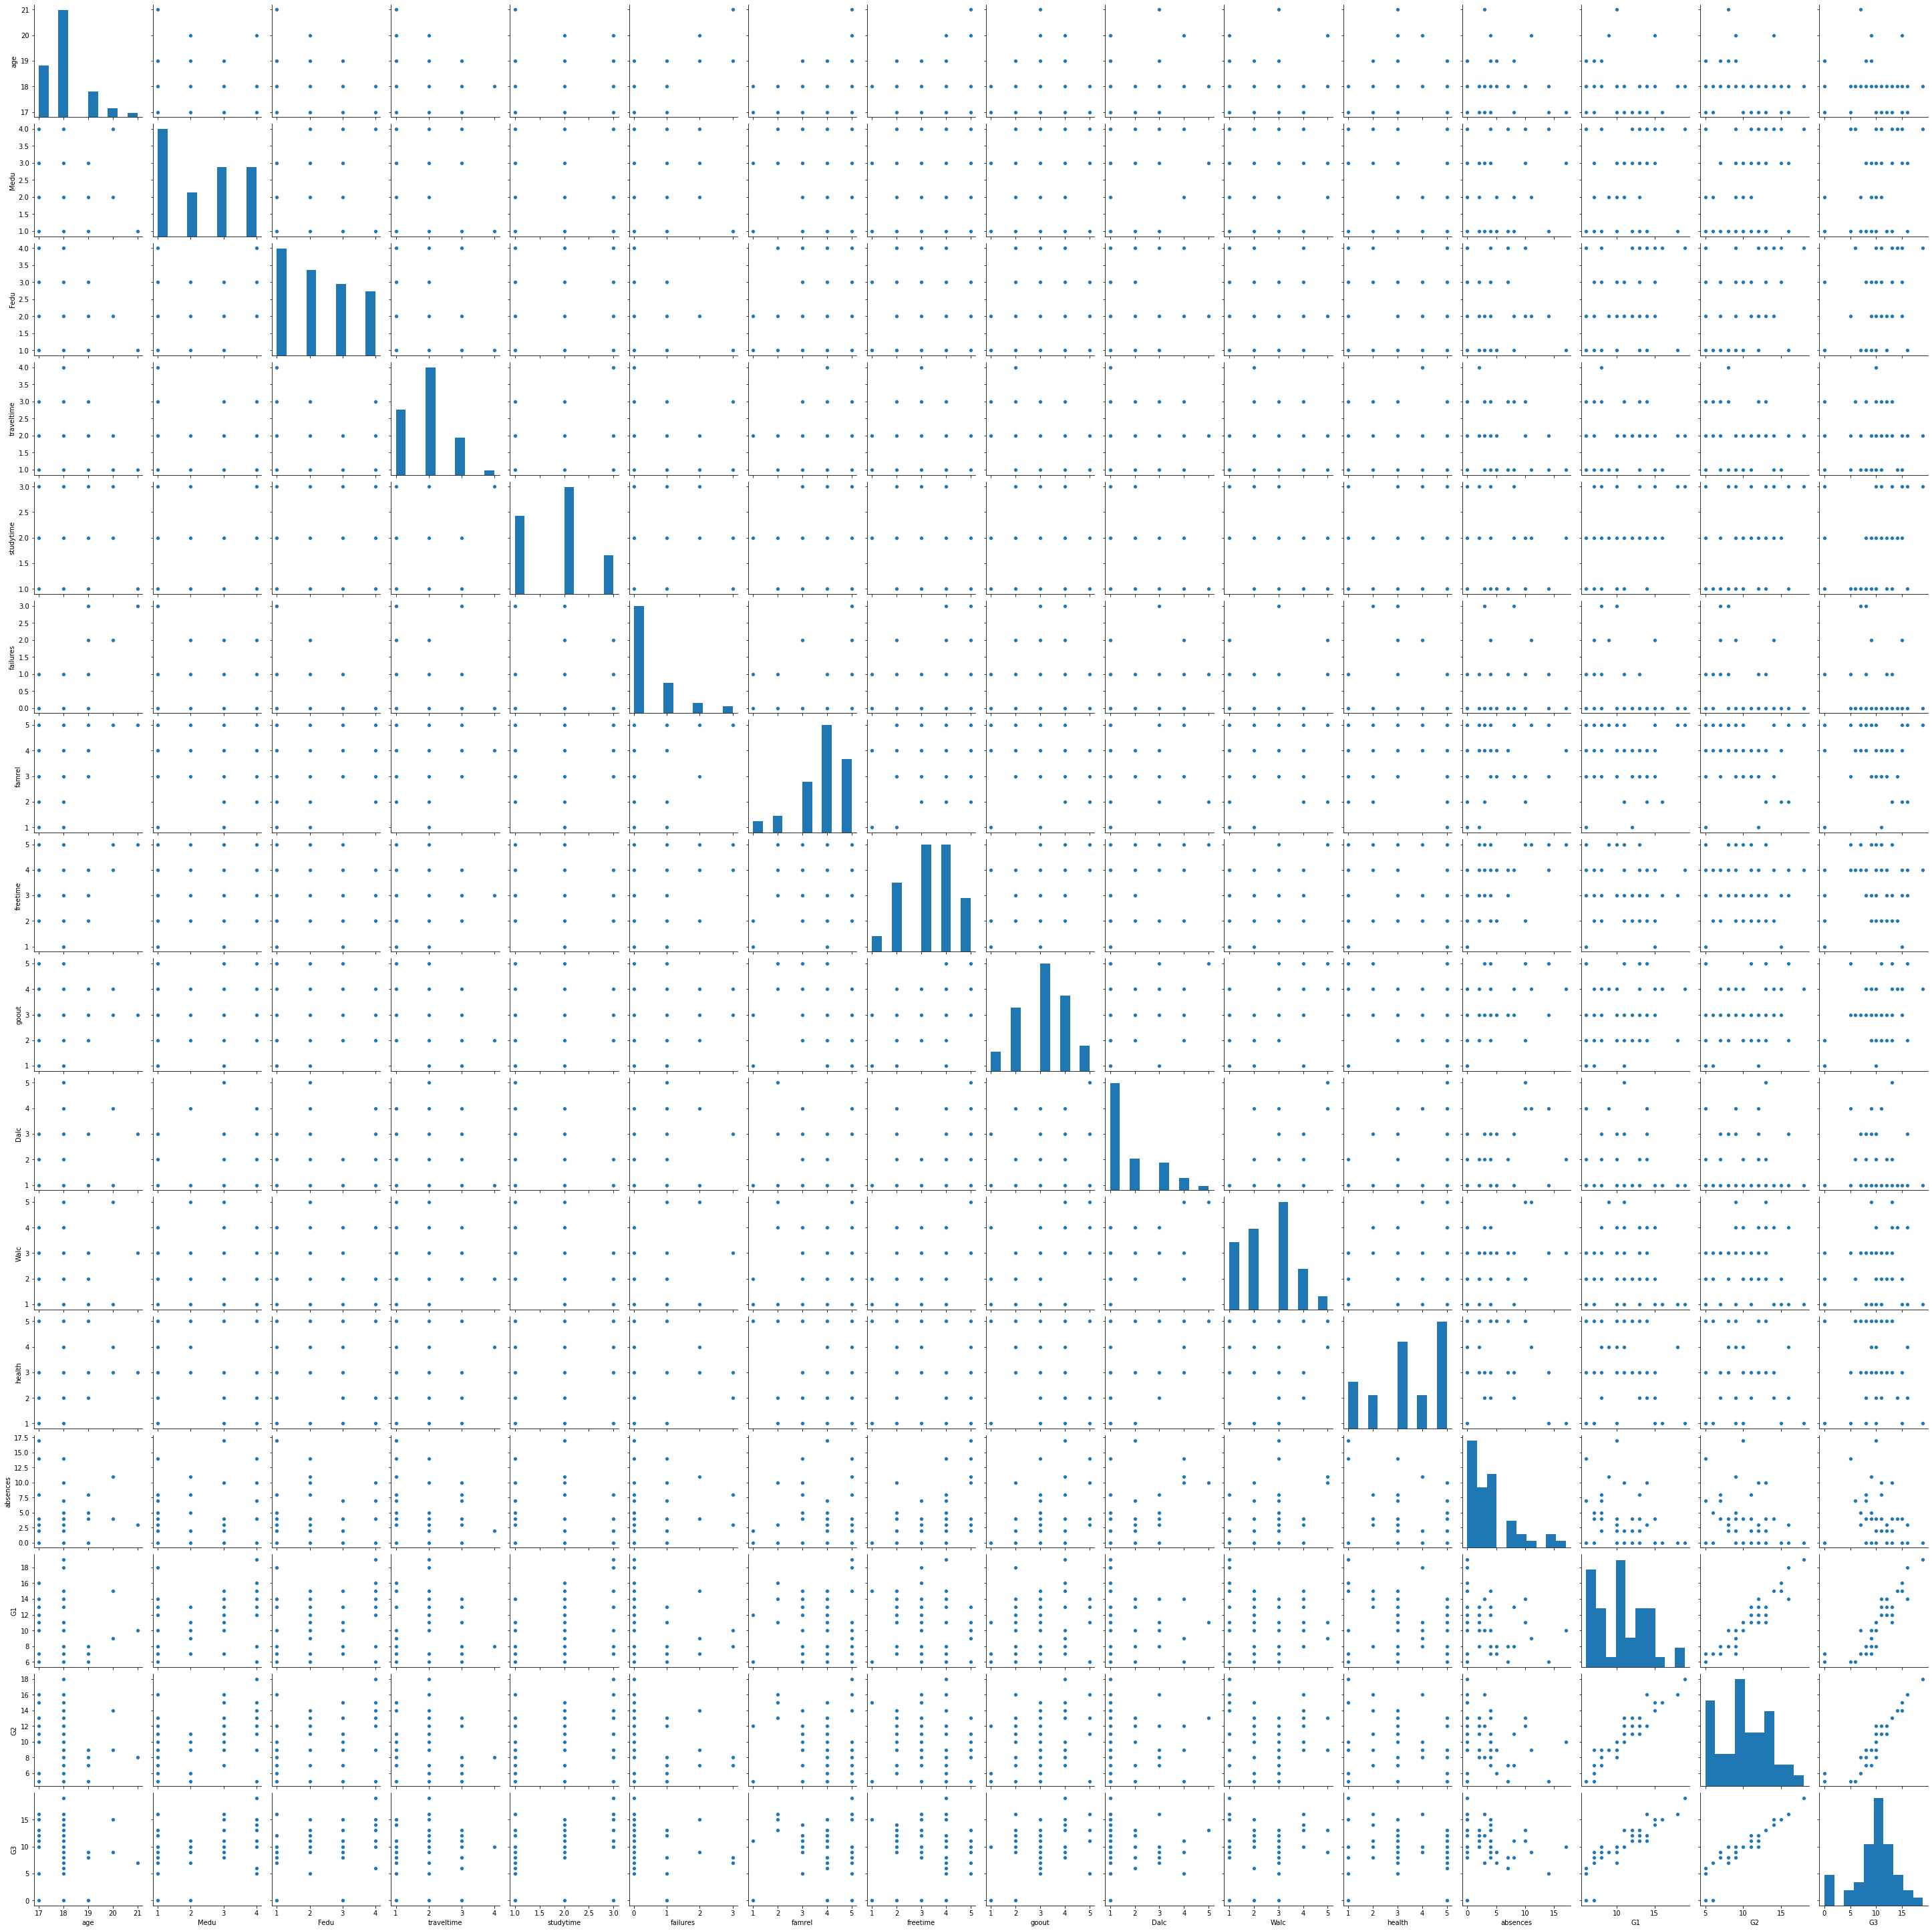

In [12]:
sns.pairplot(ms_df)

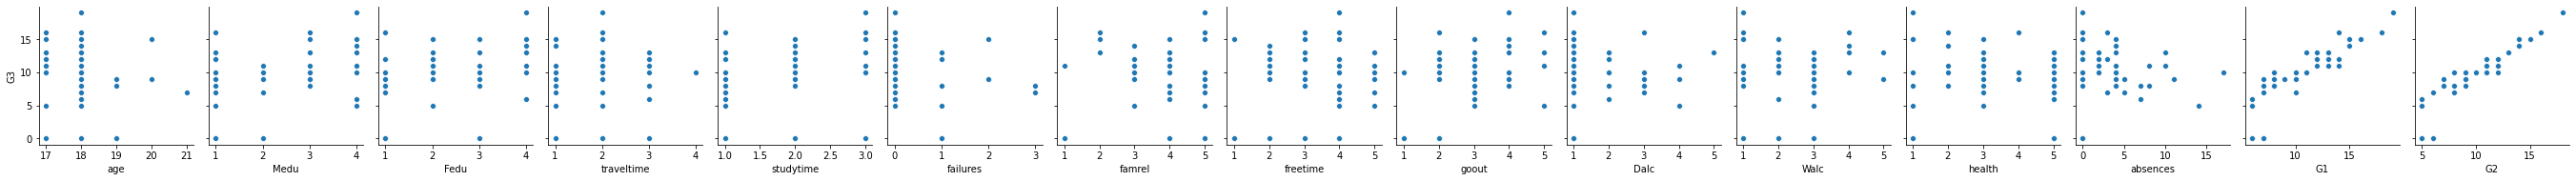

In [17]:
sns.pairplot(ms_df, x_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'], y_vars = ['G3'])

<AxesSubplot:>

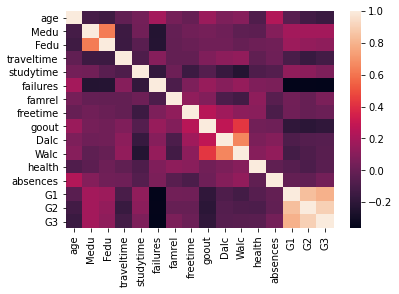

In [57]:
sns.heatmap(gp_df.corr())
# sns.heatmap(ms_df.corr(),annot=True,lw = 1)

In [47]:
#encoding categorical values

X = gp_df[gp_df.columns[:gp_df.shape[1] - 1]]
X = pd.get_dummies(data = X, drop_first = True)
# X = ms_df[ms_df.columns[:ms_df.shape[1] - 1]]
# X = pd.get_dummies(data = X, drop_first = True)

<AxesSubplot:>

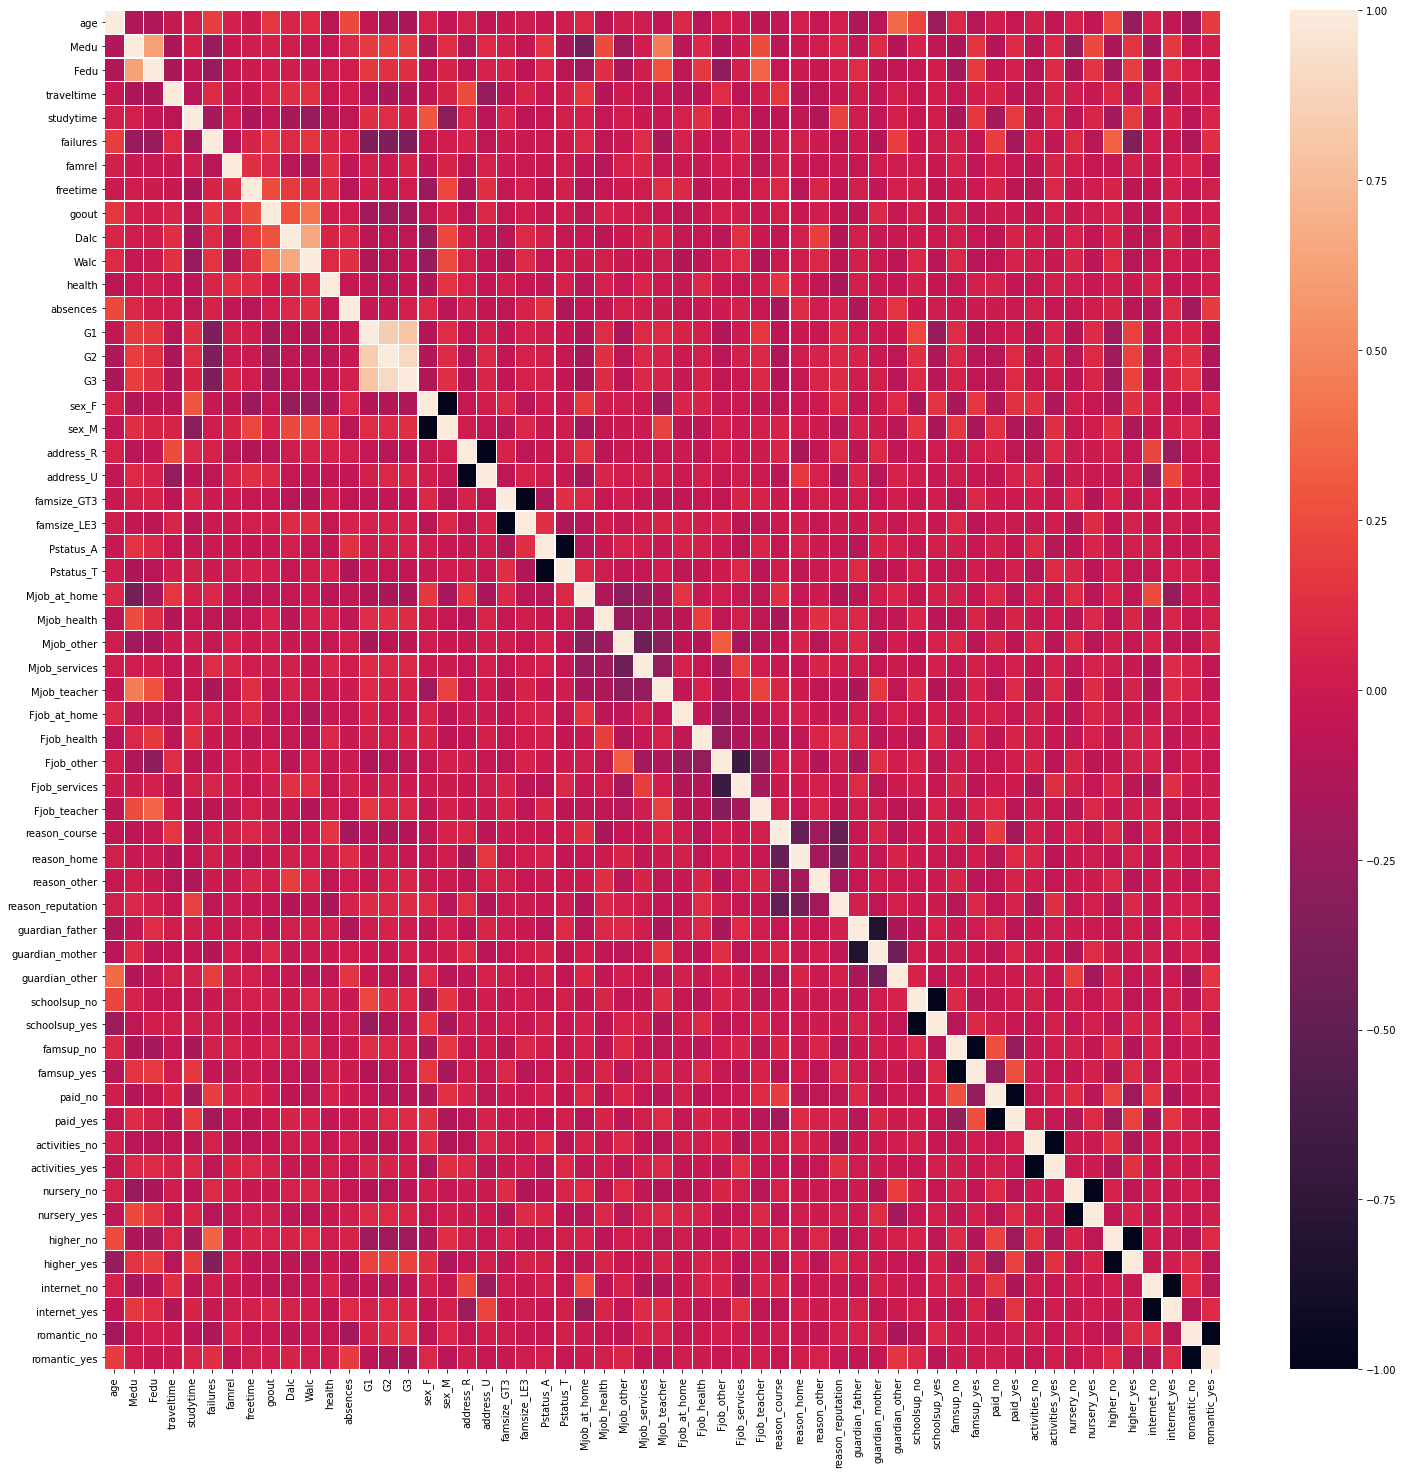

In [64]:
plt.subplots(figsize=(25,25))
corr_check_df_a = pd.get_dummies(data = gp_df)
sns.heatmap(corr_check_df_a.corr(), lw = 0.1)

<AxesSubplot:>

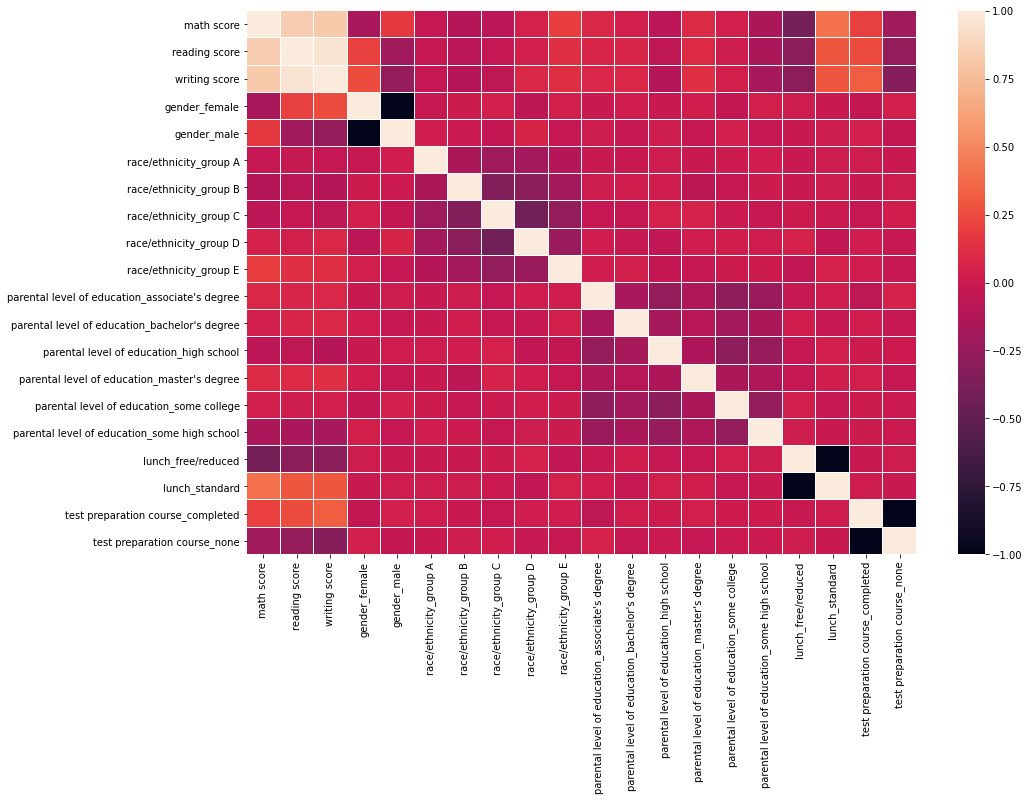

In [70]:
plt.subplots(figsize=(15,10))
corr_check_df_b = pd.get_dummies(data = df_b)
sns.heatmap(corr_check_df_b.corr(), lw = 0.01)

In [48]:
#train-test split

y = gp_df['G3']
# y = ms_df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

Model Score: 0.8563472111915083
Mean Absolute Error: 1.1478388676359026
Mean Squared Error: 3.0768854305380815
Root Mean Squared Error: 1.7541053077104811
R2 score: 0.8563472111915083


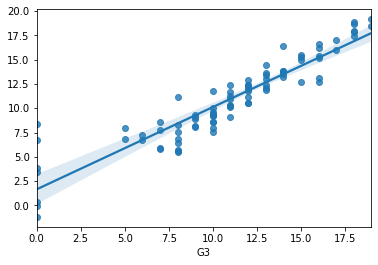

In [55]:
#model - linear regression

model = LinearRegression()
model.fit(X_train, y_train)
print('Model Score:', model.score(X_test, y_test))


#prediction

predictions = model.predict(X_test)

sns.regplot(y_test, predictions)


#evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))

Model Score: 0.8615284443051101
Mean Absolute Error: 1.0340909090909092
Mean Squared Error: 2.965909090909091
Root Mean Squared Error: 1.7221814918611484
R2 score: 0.8615284443051101


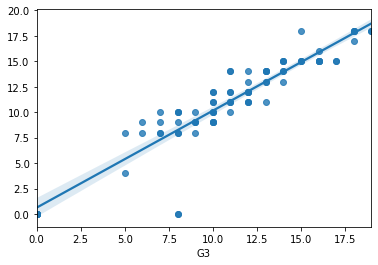

In [56]:
#model - decision tree

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('Model Score:', model.score(X_test, y_test))


#prediction

predictions = model.predict(X_test)

sns.regplot(y_test, predictions)


#evaluation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', metrics.r2_score(y_test, predictions))